# Most used graphics in Oncology trials

## Table of Contents

1. [Forest plot](#Forest-plot)
1. [Kaplan-Meier Plot](#Kaplan-Meier-Plot)
1. [Waterfall Plot](#Waterfall-Plot)


## Forest plot

[⬆️ Back to ToC](#Table-of-Contents)

This example illustrates how to create a forest plot with the **SGPLOT** procedure.

The **forest plot** graphically can display following:

- the estimates (e.g. odds ratios, hazard ratios, and log transformed hazard ratios)
- the amount of variation (e.g. 95% confidence intervals)
- in a case of meta-analysis an overall pooled estimate. 

More information about the Forest Plot can be found in the [SG Procedures Book Samples: Forest Plot](https://blogs.sas.com/content/graphicallyspeaking/2012/02/01/forest-plot-using-sgplot-procedure/).

This graph consists of the odds ratio graph in the middle, a column of study names on the left, and multiple columns of statistics on the right. 


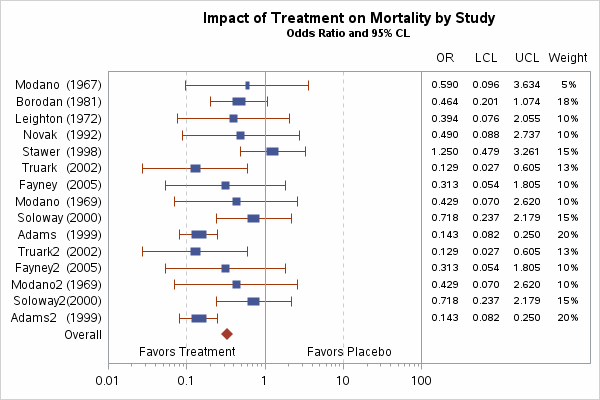

In [2]:
data forest;                                                                                                                            
   input Study $1-16 grp OddsRatio LowerCL UpperCL Weight;                                                                              
   format weight percent5. Q1 Q3 4.2 oddsratio lowercl uppercl 5.3;                                                                     
   ObsId=_N_;                                                                                                                           
   OR='OR'; LCL='LCL'; UCL='UCL'; WT='Weight';                                                                                          
   if grp=1 then do;                                                                                                                    
      weight=weight*.05;                                                                                                                
      Q1=OddsRatio-OddsRatio*weight;                                                                                                    
      Q3=OddsRatio+OddsRatio*weight;                                                                                                    
        lcl2=lowercl;                                                                                                                   
      ucl2=uppercl;                                                                                                                     
   end;                                                                                                                                 
   else study2=study;                                                                                                                   
datalines;                                                                                                                              
Modano  (1967)    1  0.590 0.096 3.634  1                                                                                               
Borodan (1981)    1  0.464 0.201 1.074  3.5                                                                                             
Leighton (1972)   1  0.394 0.076 2.055  2                                                                                               
Novak   (1992)    1  0.490 0.088 2.737  2                                                                                               
Stawer  (1998)    1  1.250 0.479 3.261  3                                                                                               
Truark   (2002)   1  0.129 0.027 0.605  2.5                                                                                             
Fayney   (2005)   1  0.313 0.054 1.805  2                                                                                               
Modano  (1969)    1  0.429 0.070 2.620  2                                                                                               
Soloway (2000)    1  0.718 0.237 2.179  3                                                                                               
Adams   (1999)    1  0.143 0.082 0.250  4                                                                                               
Truark2  (2002)   1  0.129 0.027 0.605  2.5                                                                                             
Fayney2  (2005)   1  0.313 0.054 1.805  2                                                                                               
Modano2 (1969)    1  0.429 0.070 2.620  2                                                                                               
Soloway2(2000)    1  0.718 0.237 2.179  3                                                                                               
Adams2   (1999)   1  0.143 0.082 0.250  4                                                                                               
Overall           2  0.328 0.233 0.462  .                                                                                               
;                                                                                                                                       
run;
                                                                                                                                        
proc sort data=forest out=forest2;                                                                                                      
   by descending obsid;                                                                                                                 
run;                                                                                                                                    
                                                                                                                                        
/* Add sequence numbers to each observation */                                                                                       
data forest3;                                                                                                                           
   set forest2 end=last;                                                                                                                
   retain fmtname 'Study' type 'n';                                                                                                     
   studyvalue=_n_;                                                                                                                      
   if study2='Overall' then study2value=1;                                                                                              
   else study2value = .;                                                                                                                
                                                                                                                                        
/* Output values and formatted strings to data set */                                                                                   
   label=study;                                                                                                                         
   start=studyvalue;                                                                                                                    
   end=studyvalue;                                                                                                                      
   output;                                                                                                                              
   if last then do;                                                                                                                     
      hlo='O';                                                                                                                          
      label='Other';                                                                                                                    
   end;                                                                                                                                 
run;                                                                                                                                    
                                                                                                                                        
/* Create the format from the data set */                                                                                                                                                                                                                                      
proc format library=work cntlin=forest3;                                                                                                
run;                                                                                                                                    
                                                                                                                                        
/* Apply the format to the study values and remove Overall from Study column. */                                                        
/* Compute the width of the box proportional to weight in log scale. */                                                                 
data forest4;                                                                                                                           
   format studyvalue study2value study.;                                                                                                
   drop fmtname type label start end hlo pct;                                                                                           
   set forest3 (where=(studyvalue > 0)) nobs=nobs;                                                                                      
   if studyvalue=1 then studyvalue=.;                                                                                                   
   /* Compute marker width */                                                                                                           
   x1=oddsratio / (10 ** (weight/2));                                                                                                   
   x2=oddsratio * (10 ** (weight/2));
                                                                                                   
   /* Compute top and bottom offsets */                                                                                                    
   if _n_ = nobs then do;                                                                                                                  
      pct=0.75/nobs;                                                                                                                        
      call symputx("pct", pct);                                                                                                             
      call symputx("pct2", 2*pct);                                                                                                          
      call symputx("count", nobs);                                                                                                          
   end;                                                                                                                                    
run;                                                                                                                                    
                                                                                                                                        
ods listing close;                                                                                                                      
ods html image_dpi=100 path="." file='sgplotforest.html';                                                                               
ods graphics / reset width=600px height=400px imagename="Forest_Plot_Vector" imagefmt=gif;                                              
                                                                                                                                        
title "Impact of Treatment on Mortality by Study";                                                                                      
title2 h=8pt 'Odds Ratio and 95% CL';                                                                                                   
                                                                                                                                        
proc sgplot data=forest4 noautolegend;                                                                                                  
   scatter y=study2value x=oddsratio / markerattrs=graphdata2(symbol=diamondfilled size=10);                                            
   scatter y=studyvalue x=oddsratio / xerrorupper=ucl2 xerrorlower=lcl2 markerattrs=graphdata1(symbol=squarefilled size=0);             
   vector x=x2 y=studyvalue / xorigin=x1 yorigin=studyvalue lineattrs=graphdata1(thickness=8) noarrowheads;                             
   scatter y=studyvalue x=or / markerchar=oddsratio x2axis;                                                                             
   scatter y=studyvalue x=lcl / markerchar=lowercl x2axis;                                                                              
   scatter y=studyvalue x=ucl / markerchar=uppercl x2axis;                                                                              
   scatter y=studyvalue x=wt / markerchar=weight x2axis;                                                                                
   refline 1 100  / axis=x;                                                                                                             
   refline 0.1 10 / axis=x lineattrs=(pattern=shortdash) transparency=0.5;                                                              
   inset '        Favors Treatment'  / position=bottomleft;                                                                             
   inset 'Favors Placebo'  / position=bottom;                                                                                           
   xaxis type=log offsetmin=0 offsetmax=0.35 min=0.01 max=100 minor display=(nolabel) ;                                                 
   x2axis offsetmin=0.7 display=(noticks nolabel);                                                                                      
   yaxis display=(noticks nolabel) offsetmin=0.1 offsetmax=0.05 values=(1 to &count by 1);                                              
run;                                                                                                                                    
                                                                                                                                        
ods html close;                                                                                                                         
ods listing;

## Kaplan-Meier Plot

[⬆️ Back to ToC](#Table-of-Contents)

The LIFETEST procedure is a nonparametric procedure for analyzing survival data. This procedure computes Kaplan-Meier estimates of the survivor functions and compares survival curves between groups of patients. Can be used for example:

- to display the number of subjects at risk
- confidence limits
- homogeneity test *p-value*.

More information about the **Kaplan-Meier Plot** can be found in the [SAS/STAT® 14.1 User's Guide](http://support.sas.com/documentation/cdl/en/statug/68162/HTML/default/viewer.htm#statug_lifetest_toc.htm)


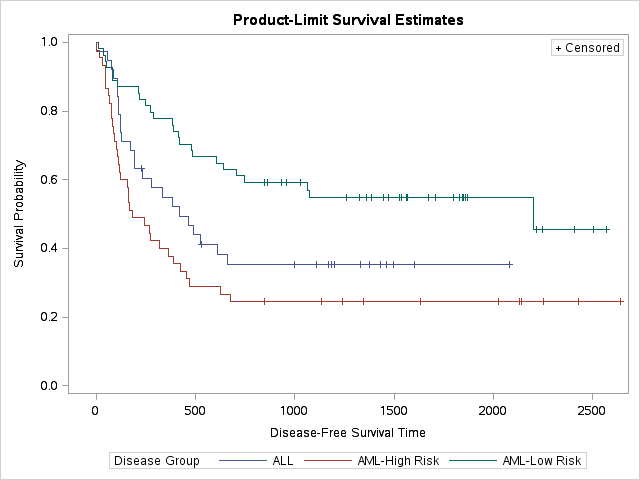

In [5]:
ods graphics on;
ods select survivalplot(persist) failureplot(persist);

proc lifetest data=sashelp.BMT;
    time T * Status(0);
    strata Group;
run;

## Waterfall Plot

[⬆️ Back to ToC](#Table-of-Contents)

A **waterfall plot** is often used to indicate how patients in the study responded to treatment in Clinical Trials.
A waterfall plot is commonly used in the Oncology domain to track the change in tumor size for subjects in a study by treatment. This plot displays the change in tumor size for each patient in the study as a bar classified by treatment, sorted by percent change.

Program from [Create a waterfall plot in SAS](https://blogs.sas.com/content/iml/2015/04/20/waterfall-plot.html)


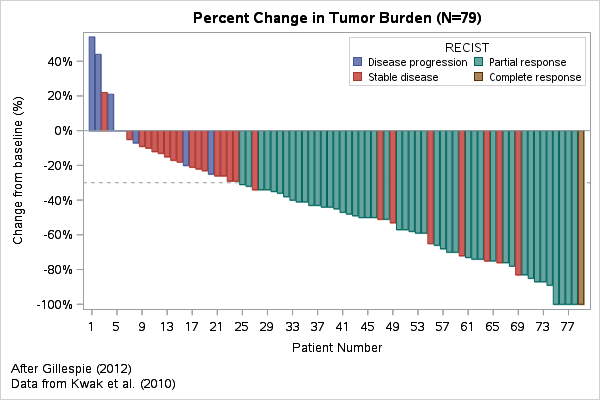

In [2]:
proc format;
value RECISTFmt   1='Disease progression'  2='Stable disease'
                  3='Partial response'     4='Complete response';
run;

data Tumor;
format PatientID z4. Response percentN7. RECIST RECISTFmt.;
input  PatientID Response RECIST;
datalines;
1001 -0.75 2 
1002 -0.73 3 
1003 -0.51 2 
1004 -0.09 2 
1005 -0.10 2 
1006 -0.17 2 
1007 -1.00 3 
1008 -0.83 3 
1009 -0.65 2 
1010 -0.53 2 
1011 -1.00 4 
1012 -0.48 3 
1013 -0.47 3 
1014 -0.85 3 
1015 -0.58 3 
1016  0.54 1 
1017 -1.00 3 
1018 -0.68 3 
1019 -0.25 1 
1020  0.21 1 
1021 -0.87 3 
1022 -0.21 2 
1023 -0.29 2 
1024 -0.20 1 
1025 -0.43 3 
1026 -0.50 3 
1027 -0.74 3 
1028 -1.00 3 
1029 -0.36 3 
1030 -0.44 3 
1031  0.22 2 
1032 -0.59 3 
1033 -0.26 2 
1034 -0.89 3 
1035 -0.57 3 
1036 -0.72 2 
1037 -0.76 3 
1038 -0.66 3 
1039 -0.44 3 
1040 -0.31 3 
1041 -0.40 3 
1042 -0.57 3 
1043 -0.74 3 
1044 -0.13 2 
1045 -0.07 1 
1046 -0.05 2 
1047 -0.29 2 
1048 -0.51 3 
1049 -0.70 3 
1050 -0.35 3 
1051 -0.43 3 
1052 -0.34 2 
1053 -0.87 3 
1054 -0.34 3 
1055 -0.59 3 
1056 -0.45 3 
1057 -0.26 2 
1058 -0.22 2 
1059 -1.00 3 
1060 -0.75 3 
1061 -0.83 2 
1062 -0.38 3 
1063 -0.70 3 
1064 -0.12 2 
1065 -0.32 3 
1066 -0.15 2 
1067 -0.49 3 
1068 -0.50 3 
1069  0.00 1 
1070 -0.41 3 
1071 -0.41 3 
1072 -0.50 3 
1073 -0.76 2 
1074 -0.78 3 
1075 -0.18 2 
1076  0.00 1 
1077  0.44 1 
1078 -0.23 2 
1079 -0.34 3
;

/* Sort by response and enumerate */
proc sort data=Tumor out=Waterfall;
   by descending Response RECIST;  *use RECIST code to break ties;
run;

data Waterfall;
   set Waterfall;
   Position + 1;                   /* Position = _N_ */
run;

title "Percent Change in Tumor Burden (N=79)";
footnote justify=left "After Gillespie (2012)";
footnote2 justify=left "Data from Kwak et al. (2010)";

/* Create a waterfall plot by using the VBAR (or HBAR) statement */
ods graphics / width=600px height=400px;
proc sgplot data=Waterfall;
   refline -0.3 / axis=y lineattrs=(pattern=shortdash);
   vbar Position / response=Response group=RECIST;
   xaxis label="Patient Number" fitpolicy=thin;
   yaxis label="Change from baseline (%)" values=(-1 to 1 by 0.2) valueshint;
   keylegend / location=inside down=2;
run;